In [1]:
import numpy as np
from brian2 import *
from brian2tools import *

WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
 [py.warnings]


In [2]:
%matplotlib inline
prefs.codegen.target = 'cython'  # weave is not multiprocess-safe!
candidates, parameters = [], []

## Setup Model to be Fit

### Parameters

In [3]:
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
VT = -63*mV

### Generate a step-current input and an "experimental" voltage trace

In [4]:
dt = 0.01*ms
input_current = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA

N, n1 = np.array([input_current]).shape
params_correct = {'gl': float(5e-5*siemens*cm**-2 * area),
          'g_na': float(100*msiemens*cm**-2 * area),
          'g_kd': float(30*msiemens*cm**-2 * area)}

defaultclock.dt = dt
I = TimedArray(input_current, dt=dt)

### The model

In [5]:
n_neurons = 4

In [6]:
eqsHH = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I(t))/Cm : volt
dm/dt = 0.32*(mV**-1)*(13.*mV-v+VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
g_na : siemens (constant)
g_kd : siemens (constant)
gl   : siemens (constant)
''')

G = NeuronGroup(n_neurons, eqsHH, method='exponential_euler')
# G.v = El
G.set_states(params_correct, units=False)

In [7]:
store()

restore()
M = StateMonitor(G, 'v', record=True)
run(20*ms)

In [8]:
np.shape(M.v)

(4, 2000)

In [9]:
# M.v[0]

In [10]:
M.contained_objects

[]

In [11]:
input_var = 'v'

In [12]:
M.get_states(input_var)

{'v': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [-3.24918764e-02, -3.24918764e-02, -3.24918764e-02,
         -3.24918764e-02],
        [-6.49532185e-02, -6.49532185e-02, -6.49532185e-02,
         -6.49532185e-02],
        ...,
        [-7.81882124e+01, -7.81882124e+01, -7.81882124e+01,
         -7.81882124e+01],
        [-7.81816199e+01, -7.81816199e+01, -7.81816199e+01,
         -7.81816199e+01],
        [-7.81750307e+01, -7.81750307e+01, -7.81750307e+01,
         -7.81750307e+01]]) * mvolt}

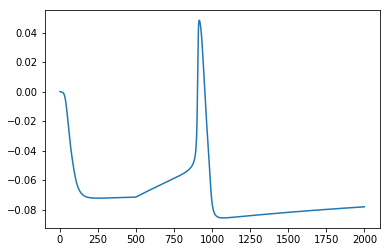

In [13]:
plt.plot(M.v[0])

In [14]:
y = np.array(M.v[0]) + np.random.randn(len(M.v[0]))
x = np.array(M.v[1:])+ np.random.randn(3,len(M.v[0]))

In [15]:
y

array([-0.01831032,  0.57510595, -0.60967765, ...,  0.81082823,
       -0.04249677, -0.26749754])

In [16]:
from sklearn.metrics import mean_squared_error

rms_list = []
for row in x:
    rms = np.sqrt(mean_squared_error(y, row))
    rms_list.append(rms)
    print(rms)

1.422684940904923
1.3899987969652048
1.4375132054954254


In [17]:
rms_list

[1.422684940904923, 1.3899987969652048, 1.4375132054954254]

In [18]:
a = [0.1, 0.2, 0.3]

In [19]:
rms_err = np.average(rms_list, weights=a)
rms_err

1.4192036918869346

### 2D input

In [73]:
input_current0 = np.hstack([np.zeros(int(100)), np.ones(int(100)), np.zeros(int(100))])
input_current1 = np.hstack([np.zeros(int(100)), np.ones(int(100))*2, np.zeros(int(100))])

input_current2 = np.stack((input_current0, input_current1)) *nA

np.shape(input_current2)

(2, 300)

In [74]:
input_current2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [75]:
start_scope()

In [76]:
input_traces = zeros((10,5))*volt
for i in range(5):
    input_traces[5:,i]=i*10*mV

input_traces

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0., 10., 20., 30., 40.],
       [ 0., 10., 20., 30., 40.],
       [ 0., 10., 20., 30., 40.],
       [ 0., 10., 20., 30., 40.],
       [ 0., 10., 20., 30., 40.]]) * mvolt

In [77]:
np.shape(input_traces)

(10, 5)

In [78]:
N, n1 = np.array([input_current]).shape
params_correct = {'gl': float(5e-5*siemens*cm**-2 * area),
          'g_na': float(100*msiemens*cm**-2 * area),
          'g_kd': float(30*msiemens*cm**-2 * area)}

defaultclock.dt = dt
I = TimedArray(input_current2, dt=dt)

In [79]:
eqsHH = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I(t))/Cm : volt
dm/dt = 0.32*(mV**-1)*(13.*mV-v+VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
g_na : siemens (constant)
g_kd : siemens (constant)
gl   : siemens (constant)
''')

G = NeuronGroup(n_neurons, eqsHH, method='exponential_euler')
# G.v = El
G.set_states(params_correct, units=False)

In [80]:
store()

restore()
M = StateMonitor(G, 'v', record=True)
run(20*ms)

BrianObjectException: Original error and traceback:
Traceback (most recent call last):
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/core/network.py", line 864, in before_run
    obj.before_run(run_namespace)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/groups/neurongroup.py", line 880, in before_run
    self.equations.check_units(self, run_namespace=run_namespace)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/equations/equations.py", line 956, in check_units
    all_variables)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/equations/unitcheck.py", line 40, in check_dimensions
    expr_dims = parse_expression_dimensions(expression, variables)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/parsing/expressions.py", line 317, in parse_expression_dimensions
    left_dim = parse_expression_dimensions(expr.left, variables)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/parsing/expressions.py", line 318, in parse_expression_dimensions
    right_dim = parse_expression_dimensions(expr.right, variables)
  File "/home/alteska/Desktop/brian/brian2/build/lib.linux-x86_64-3.7/brian2/parsing/expressions.py", line 280, in parse_expression_dimensions
    len(func._arg_units)))
  File "<string>", line None
SyntaxError: Function I was called with 1 parameters, needs 2.

Error encountered with object named "neurongroup_5".
Object was created here (most recent call only, full details in debug log):
  File "<ipython-input-79-8f64053cf96a>", line 14, in <module>
    G = NeuronGroup(n_neurons, eqsHH, method='exponential_euler')

An error occurred when preparing an object.   File "<string>", line None

SyntaxError: Function I was called with 1 parameters, needs 2.
(See above for original error message and traceback.)